# math dataset

In [1]:
# Test run for feasiblity of converting DeepMind's math dataset to LaTeX format

# Example mockup file path
deepmind_file = "/home/rc/version-cv/data/googledeepmind/math/train-medium/arithmetic__mul.txt"

latex_converted = []

with open(deepmind_file, "r") as f:
    lines = f.readlines()

for line in lines[:100]:  # Check first 100 for feasibility
    if line.strip():
        latex_line = f"${line.strip()}$"
        latex_converted.append(latex_line)

print("First 5 converted lines:")
for l in latex_converted[:5]:
    print(l)

First 5 converted lines:
$What is 5 times 134945?$
$674725$
$Multiply 0 and -169144.$
$0$
$Multiply -9344 and 0.$


In [3]:
import sys
sys.path.append("../modules")

from dataloader030 import create_latex_doc

# Just test on one example
example_latex = latex_converted[0]
create_latex_doc(example_latex, output_path="deepmind_sample.tex")

2025-07-11 07:31:05.761203: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# The Regex library can optimize for .txt files
import re

def convert_to_math_expr(text_line):
    # Example heuristic
    match = re.search(r'(\-?\d+)\s+times\s+(\-?\d+)', text_line)
    if match:
        a, b = match.groups()
        return f"${a} \\times {b}$"
    else:
        return f"${text_line.strip()}$"

In [5]:
# Test run
test_line = "What is 5 times 134945?"
print(convert_to_math_expr(test_line))  # $5 \times 134945$

$5 \times 134945$


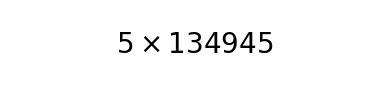

In [6]:
import matplotlib.pyplot as plt

latex_str = r"$5 \times 134945$"  # or any converted LaTeX string

fig, ax = plt.subplots(figsize=(4, 1))
ax.text(0.5, 0.5, latex_str, fontsize=20, ha='center', va='center')
ax.axis('off')
plt.tight_layout()
plt.savefig("latex_expression.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
# Add dependencies
#!pixi add pdf2image

In [14]:
from pdf2image import convert_from_path

# Increase DPI for larger, clearer image
images = convert_from_path("deepmind_sample.pdf", dpi=300)  # Set dpi as needed
images[0].save("deepmind_latex_expression.png", "PNG")

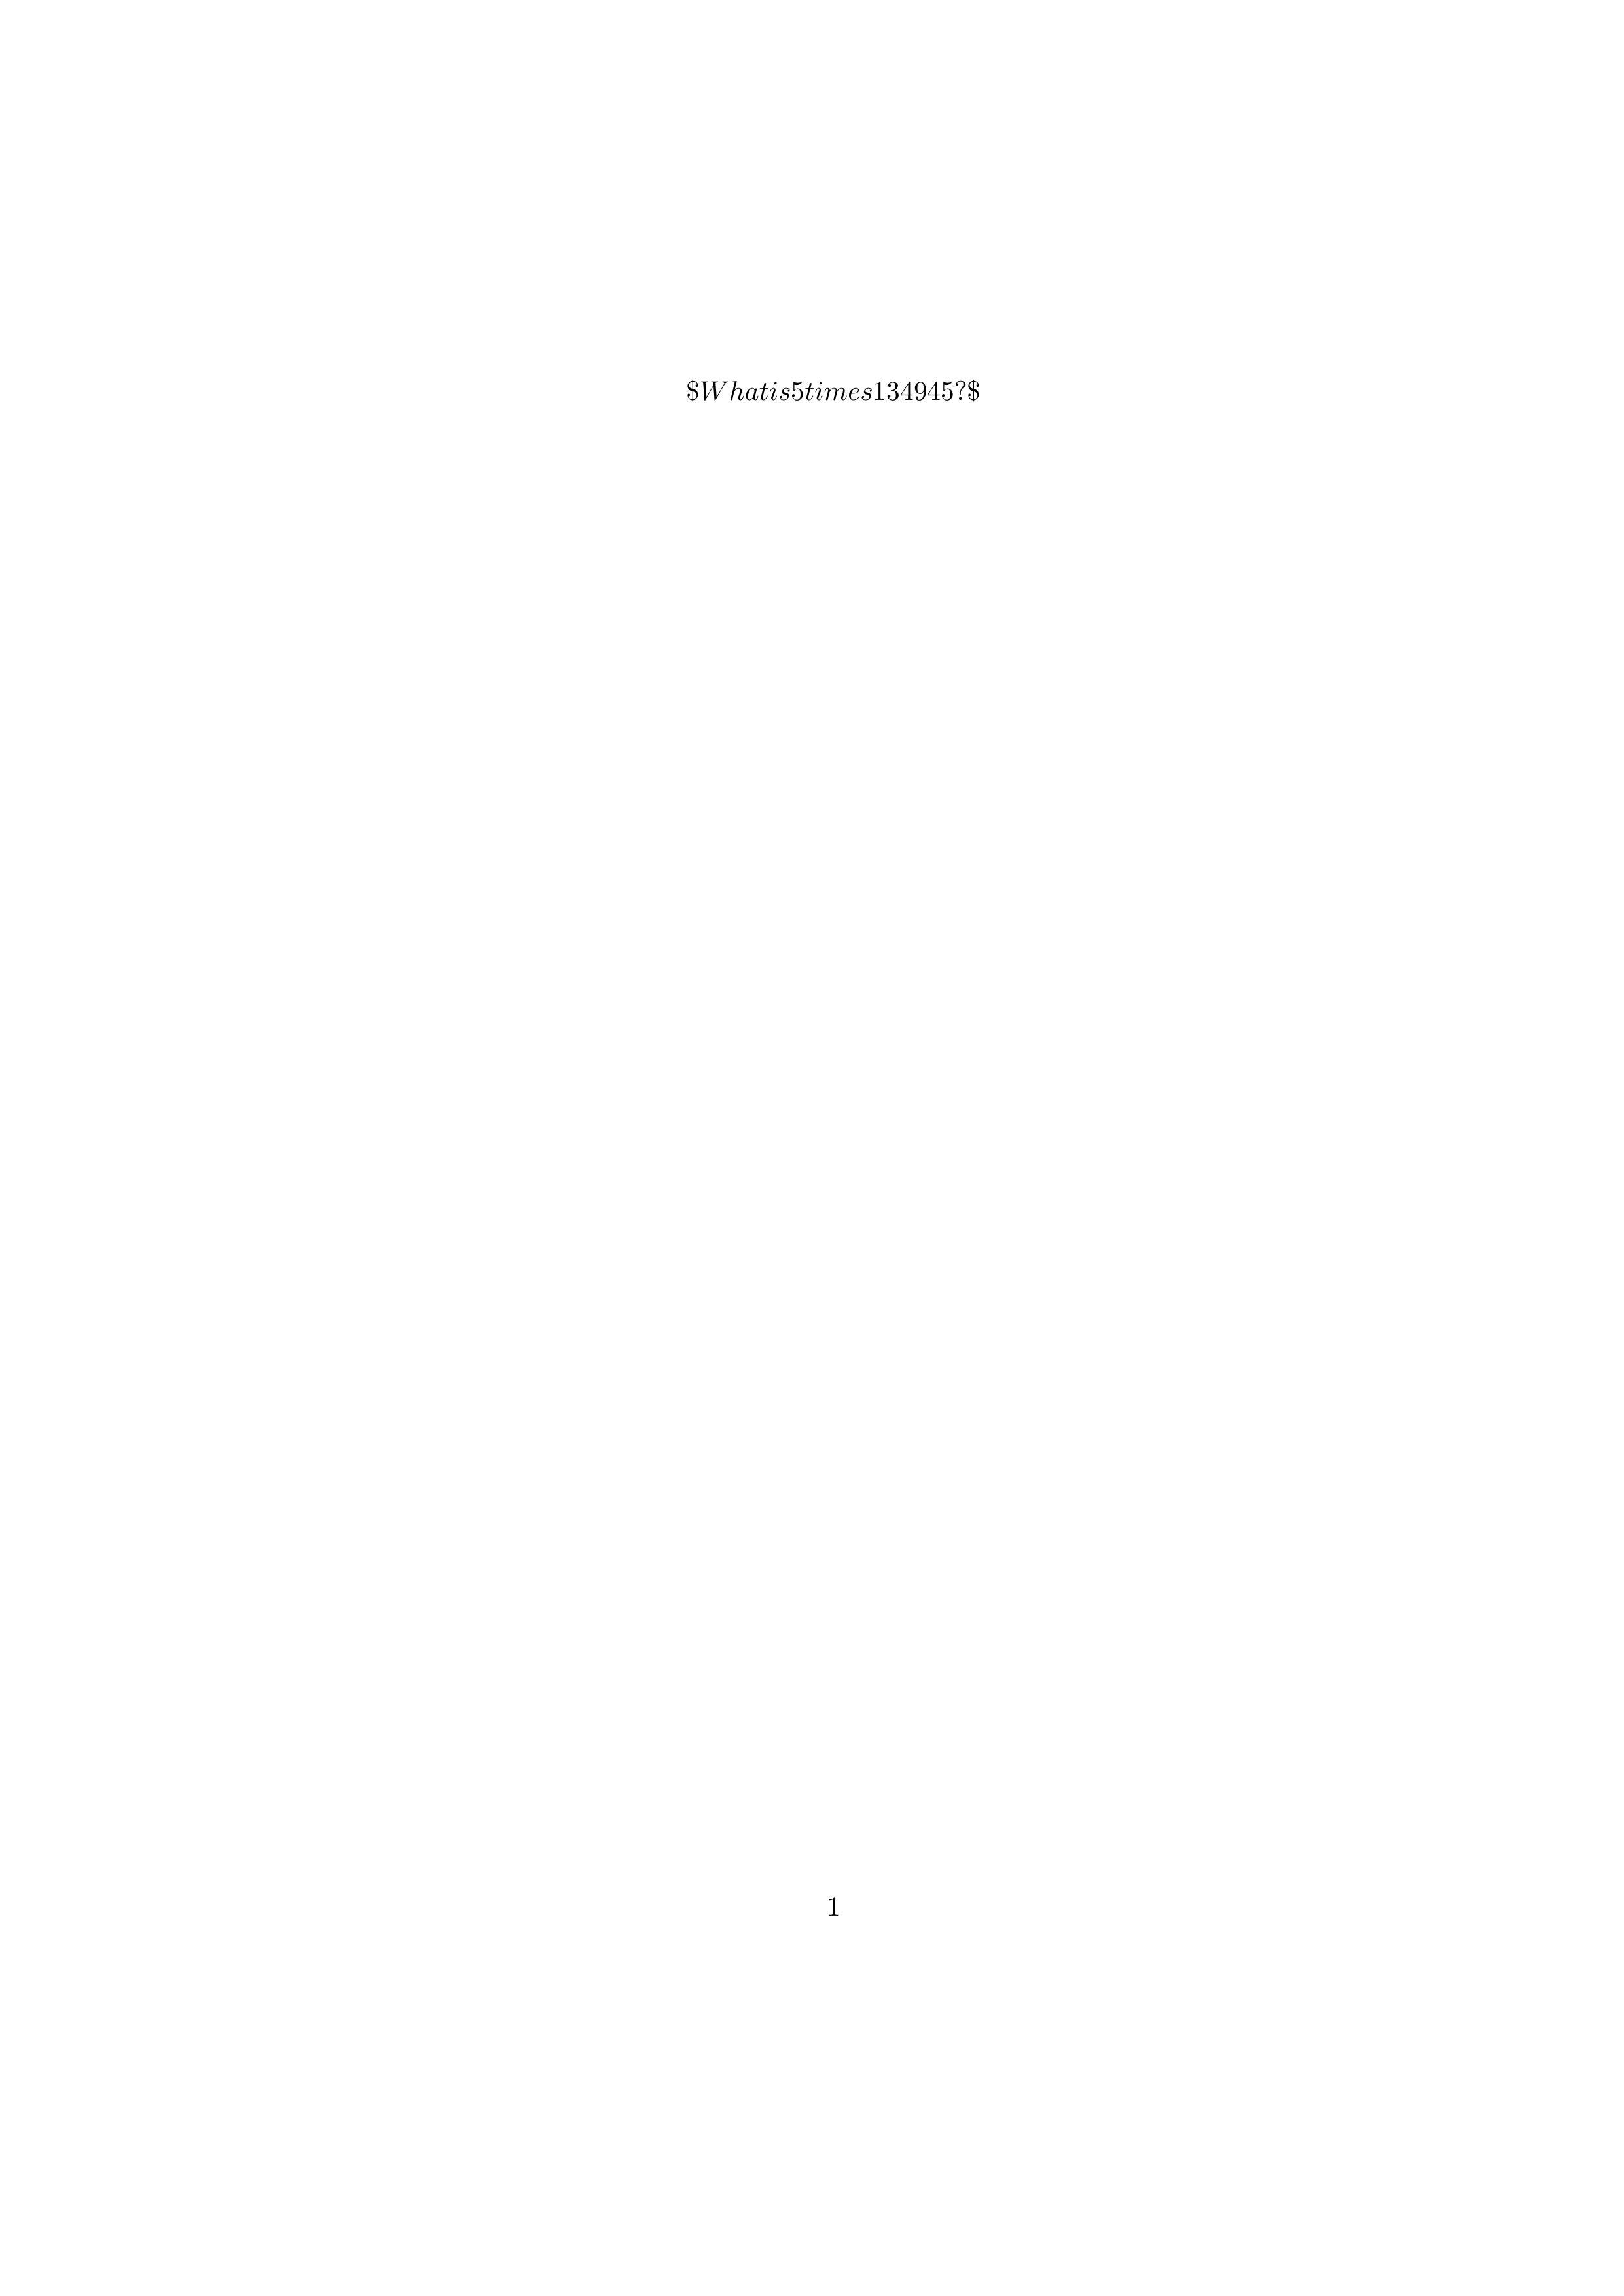

In [18]:
from IPython.display import Image

# Test png stdout
Image(filename="deepmind_latex_expression.png")

In [ ]:
# preliminary look at math dataset. end of test runs